# EDA to Prediction

## Part 1) Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

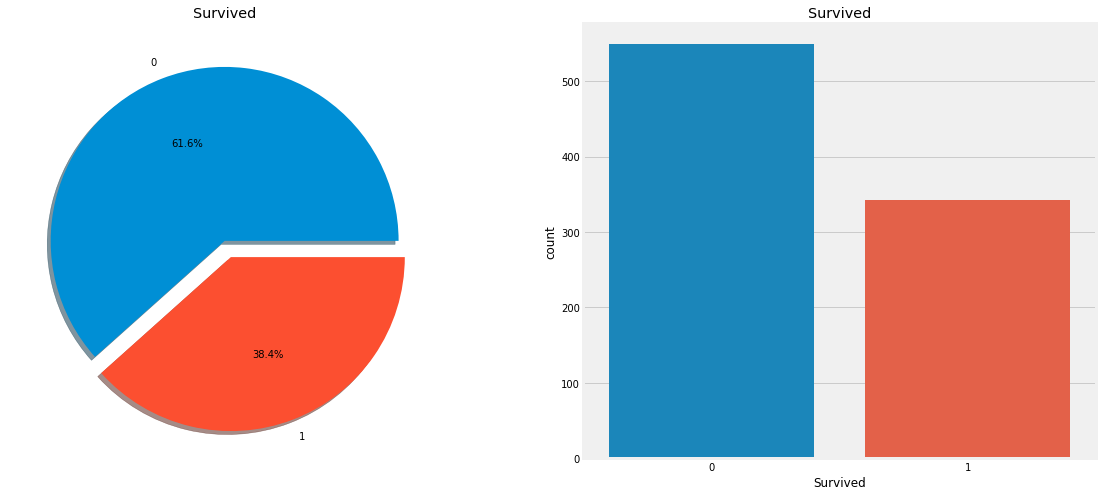

In [4]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

### Analysing the Features

### Sex -> Categorical Feature

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

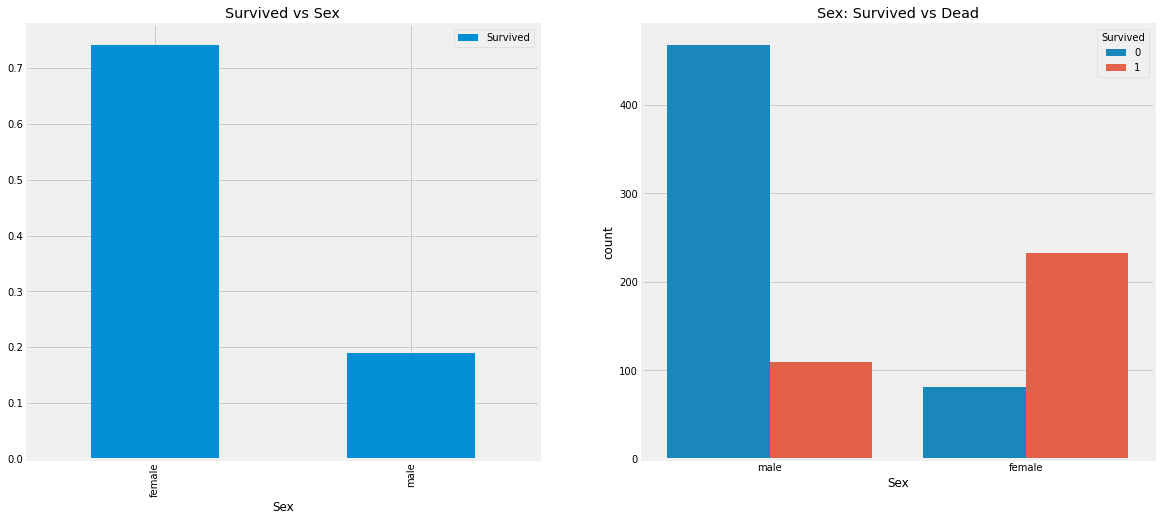

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### Pclass -> Ordinal Feature

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


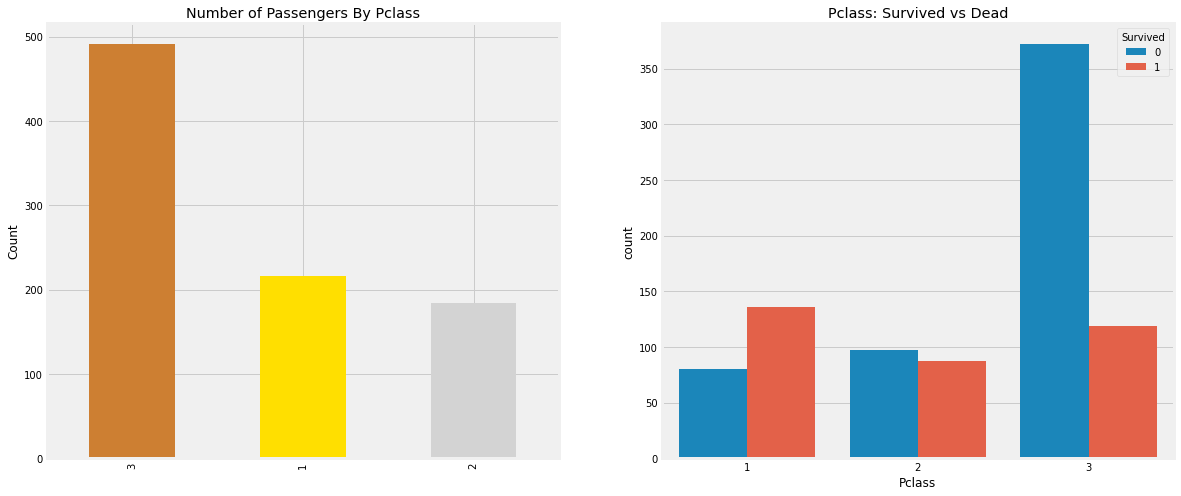

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

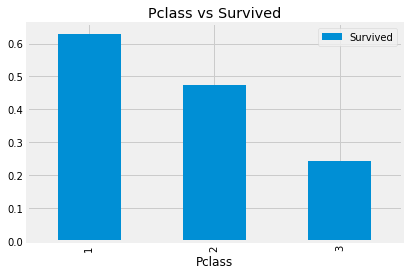

In [15]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
plt.title('Pclass vs Survived')
plt.show()

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

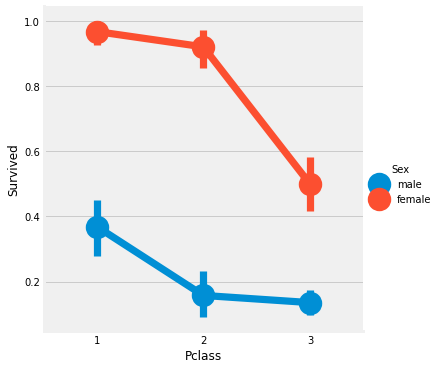

In [17]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

### Age -> Continuous Feature

In [18]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


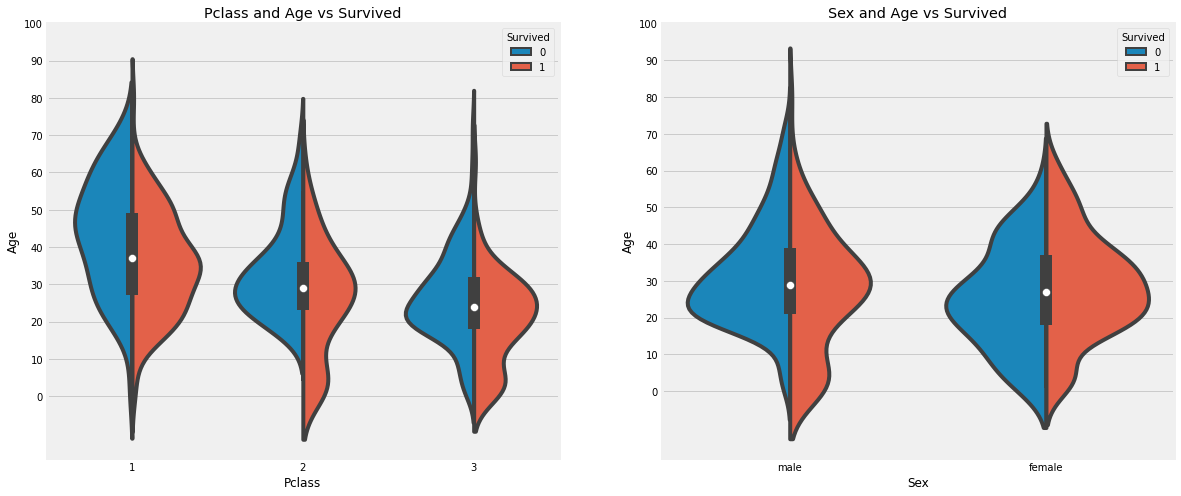

In [22]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- The number of children increases with Pclass and the survival rate for passengers below age 10 looks to be good irrespective of the Pclass. 
- Survival chances for passengers aged 20-50 from Paclss 1 is high and is even better for women.
- For males, the survival chances decreases with and increase in age.

- We can assign the NaN values in age the mean age of the dataset. We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr. or Mrs. Thus we can assign the mean values of Mr. and Mrs. to the respective groups.

In [23]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Extracting the salutations

In [24]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r') #Checking the Initial with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are some misspelled initials like Mlle or Mme that stand for Miss. Let's replce the mwith Miss and same thing for other values.

In [25]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

In [26]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [27]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [28]:
data.Age.isnull().any()

False

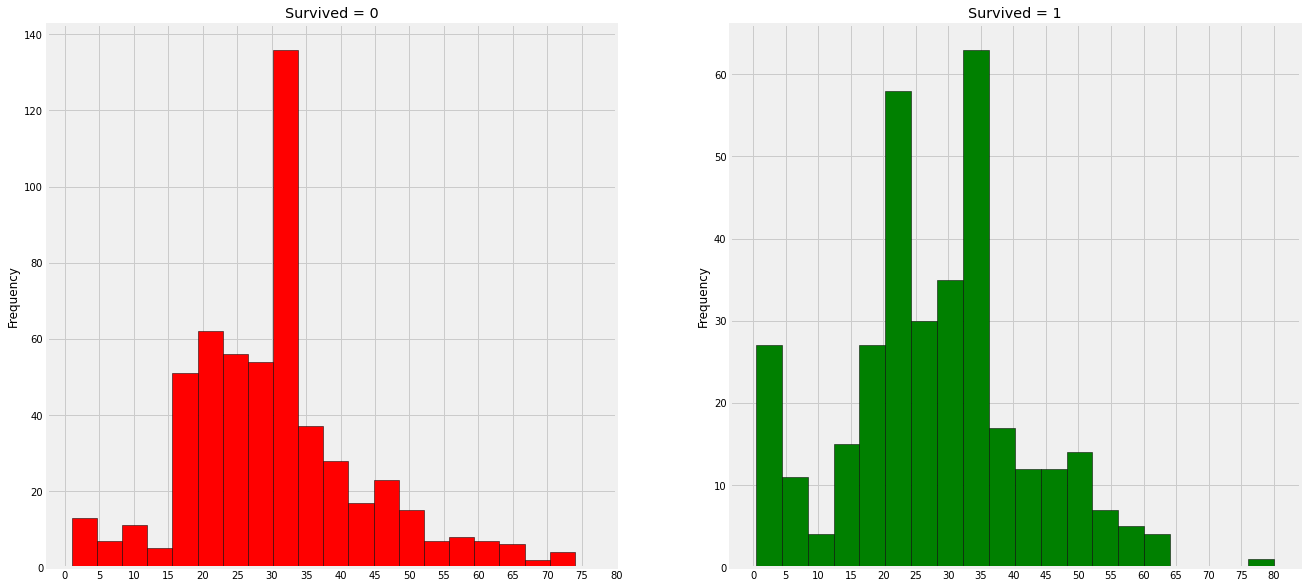

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

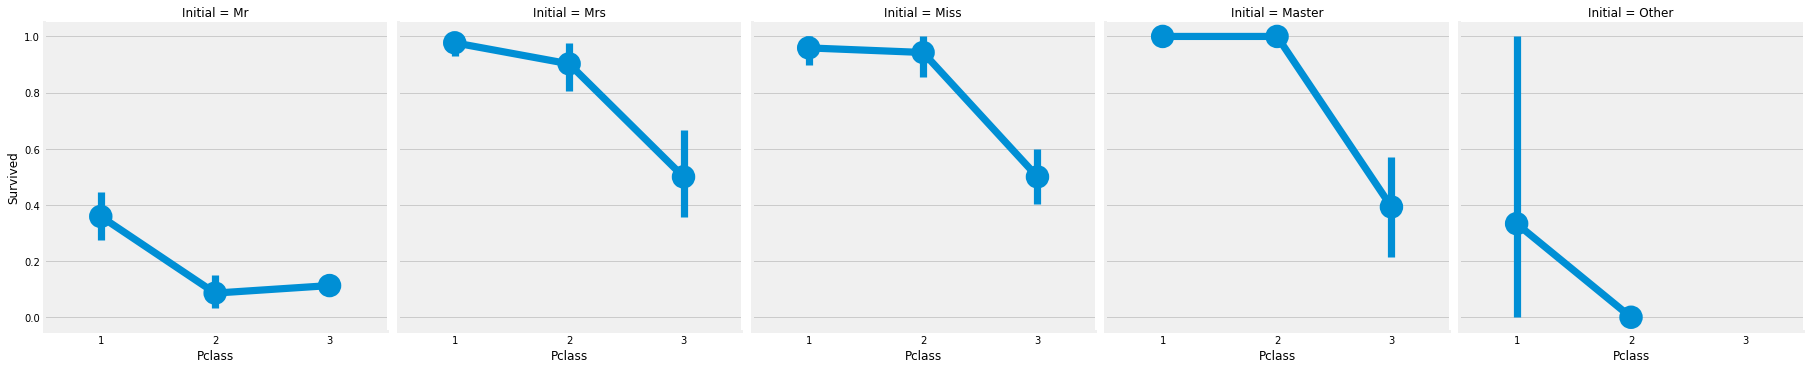

In [30]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

The women and child first policy thus holds true irrespective of the class.

### Embarked -> Categorical Value

In [31]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

### Chances for Survival by Port of Embarkation

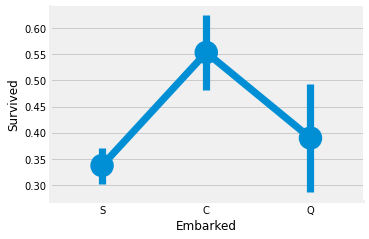

In [32]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

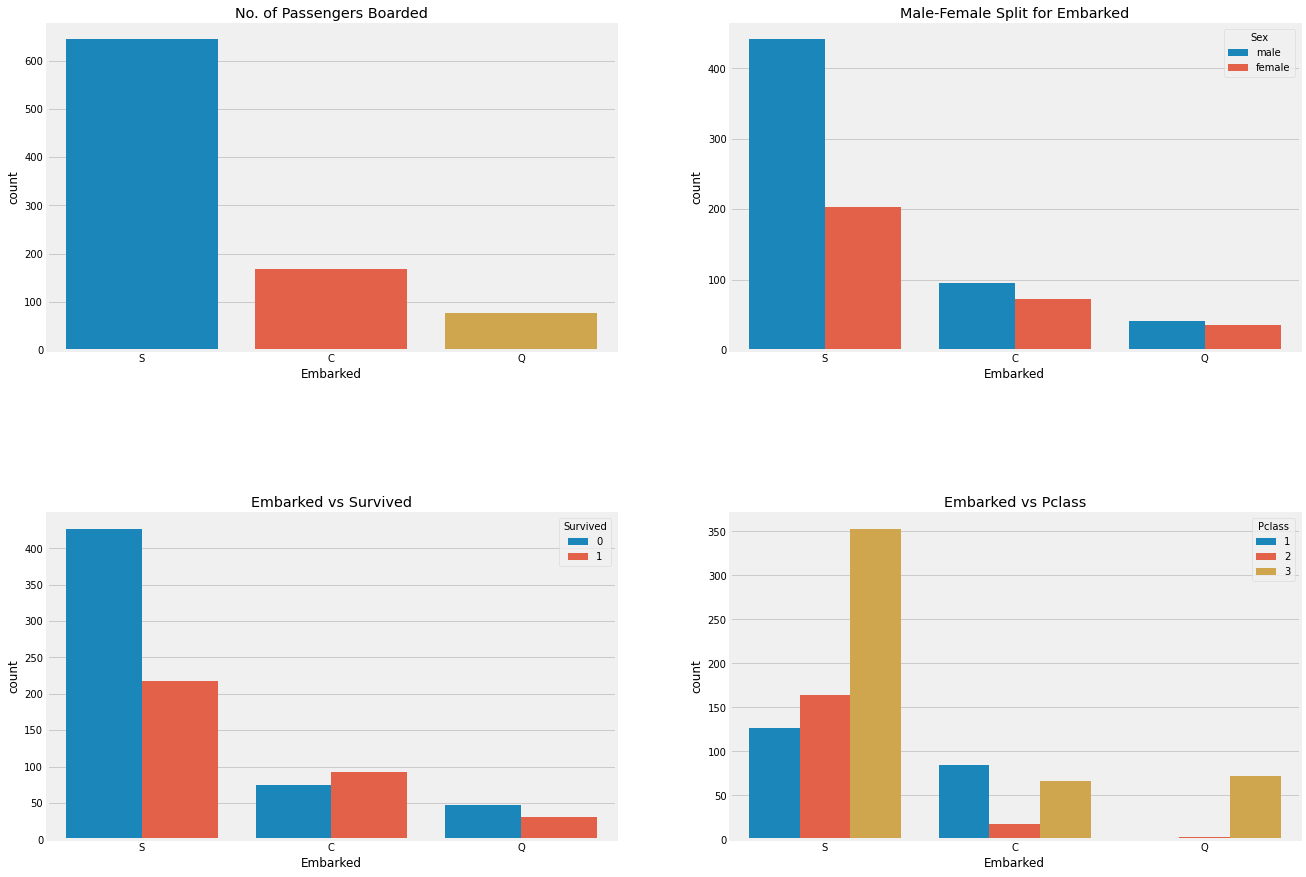

In [33]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

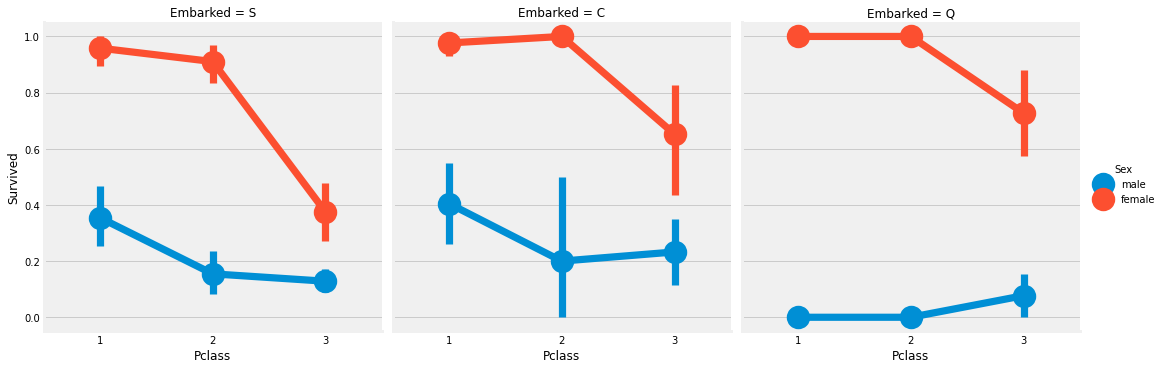

In [34]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

### Filling Embarked NaN

In [35]:
data['Embarked'].fillna('S', inplace = True)

In [36]:
data.Embarked.isnull().any()

False

### SibSp -> Discrete Feature

In [40]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


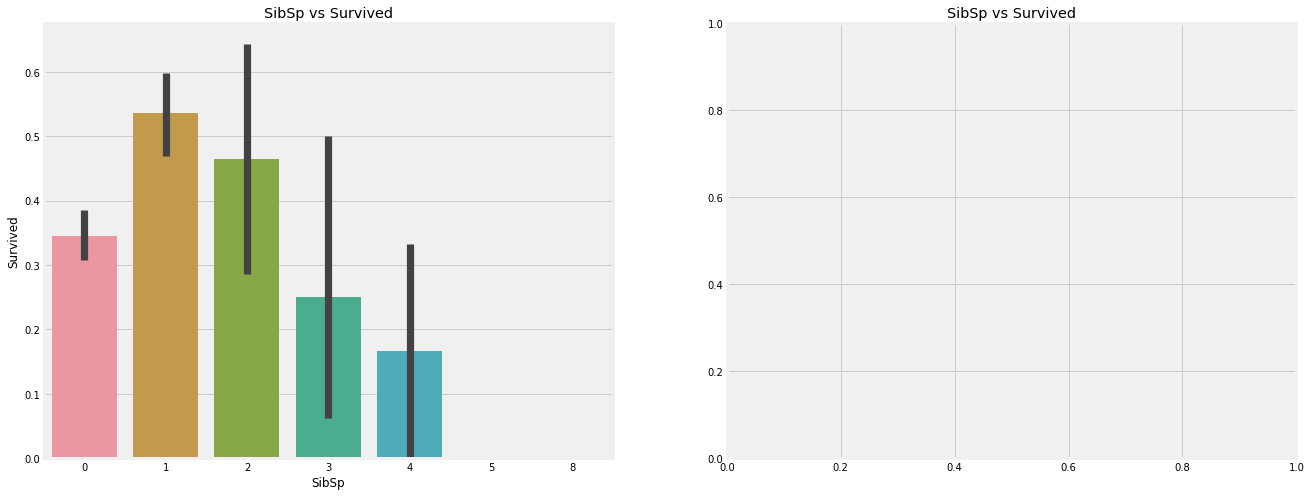

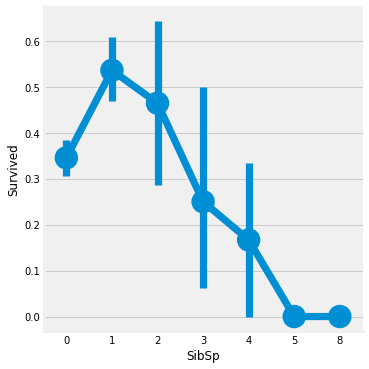

In [65]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [67]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

In [68]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


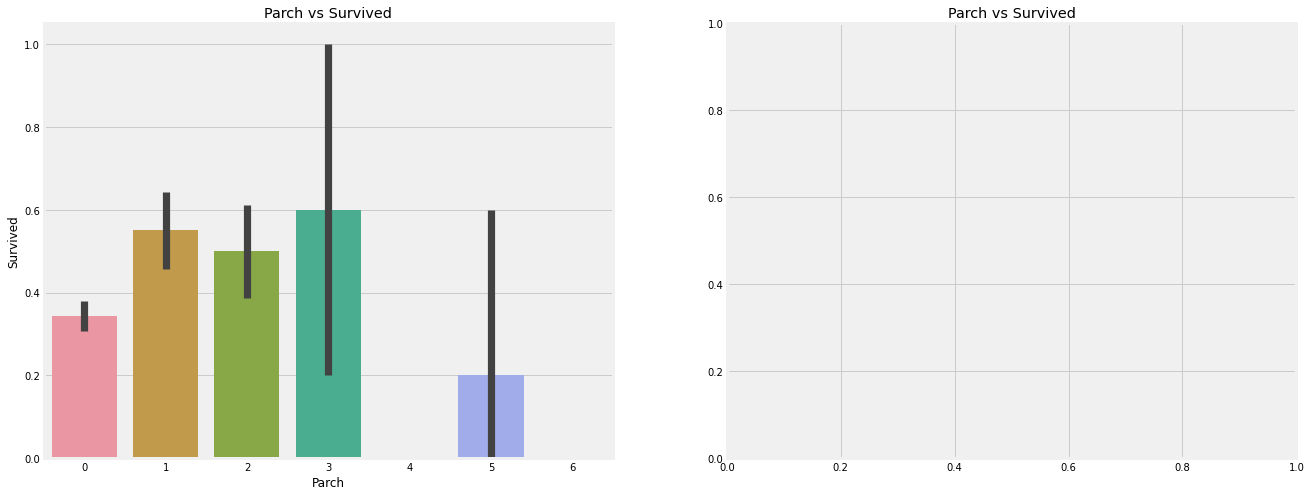

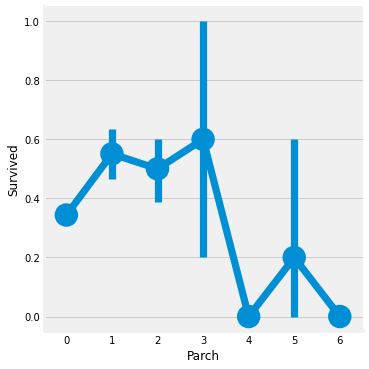

In [74]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

### Fare -> Continuous Feature

In [75]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


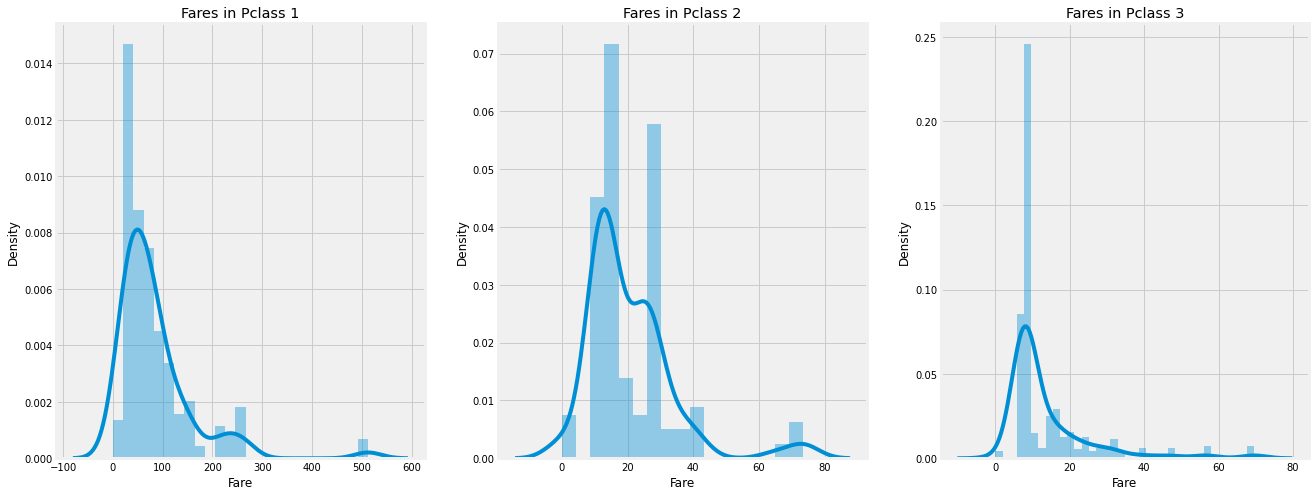

In [76]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Correlation Between the Features

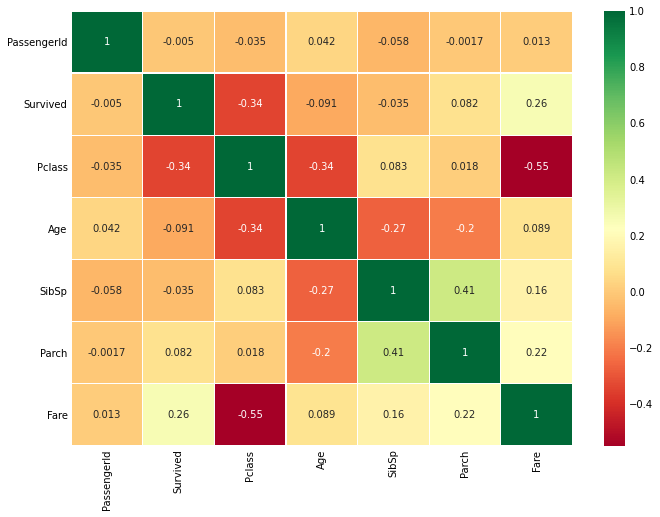

In [78]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## Part 2) Feature Engineering and Data Cleaning

### Age_band

I need to convert continous values into categorical values.

In [79]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [81]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


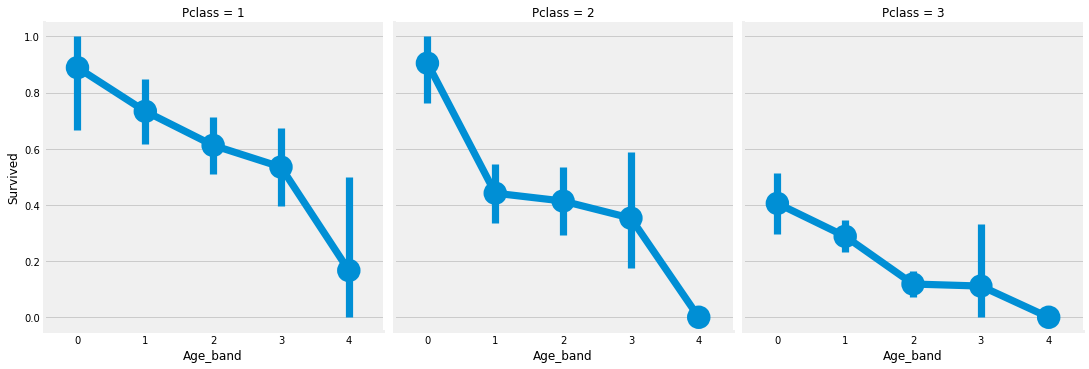

In [82]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

The survival rate decreases as the age increases irrespective of the Pclass.

### Family_size and Alone

In [83]:
data['Family_size'] = 0
data['Family_size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_size == 0, 'Alone'] = 1

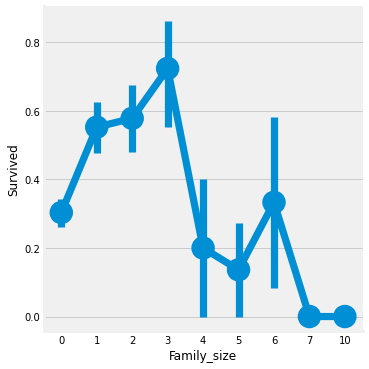

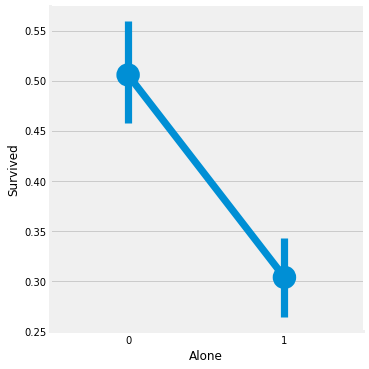

In [89]:
f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_size', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Family_size vs Survived')

sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(1)
plt.show()

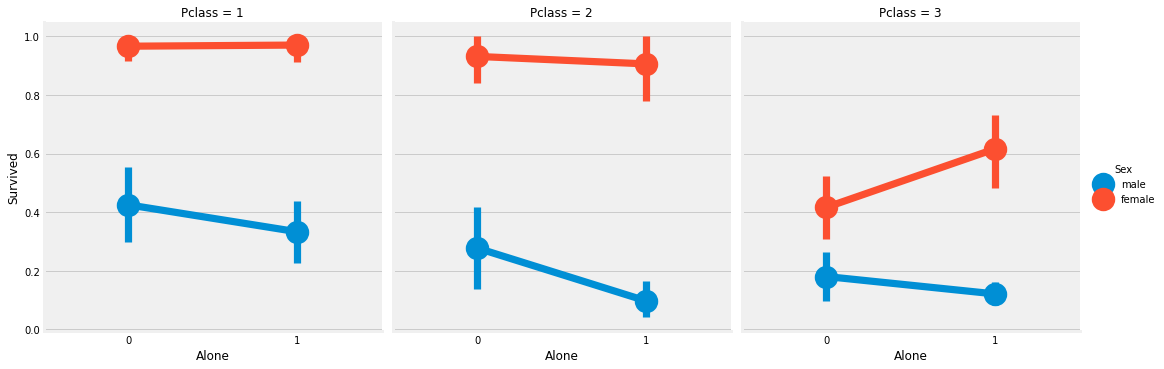

In [90]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

### Fare_Range

In [91]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [92]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_cat'] = 2
data.loc[data['Fare'] > 31.0, 'Fare_cat'] = 3

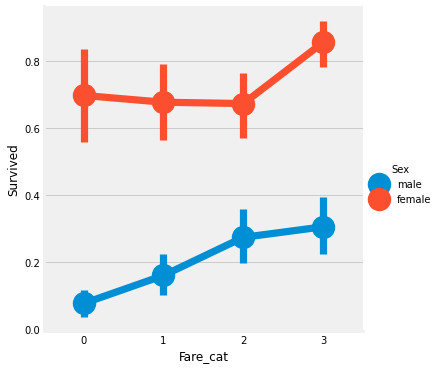

In [93]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

### Converting String Values into Numeric

In [94]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

### Dropping Unnecessary Features
- Name, Age -> Age_band, Ticket, Fare -> Fare_cat, Cabin, Fare_range -> Fare_cat, PassengerId

In [96]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)

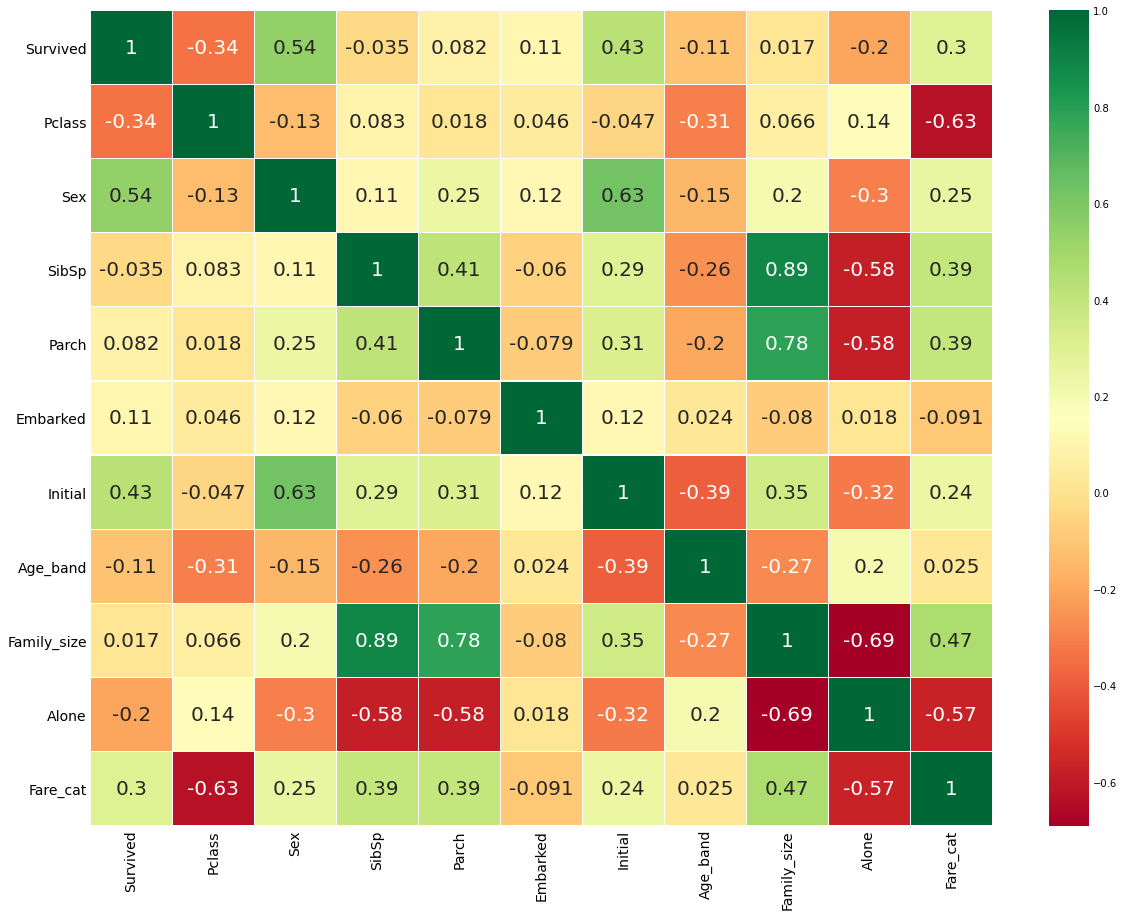

In [97]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Part 3) Predictive Modeling

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [101]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machine (rbf-SVM)

In [102]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine (linear-SVM)

In [103]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


### Logistic Regression

In [107]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for the Logistic Regression is  0.8134328358208955


### Decision Tree

In [108]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decission Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for the Decission Tree is  0.8059701492537313


### K-Nearest Neighbors (KNN)

In [109]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for the KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy for the KNN is  0.832089552238806


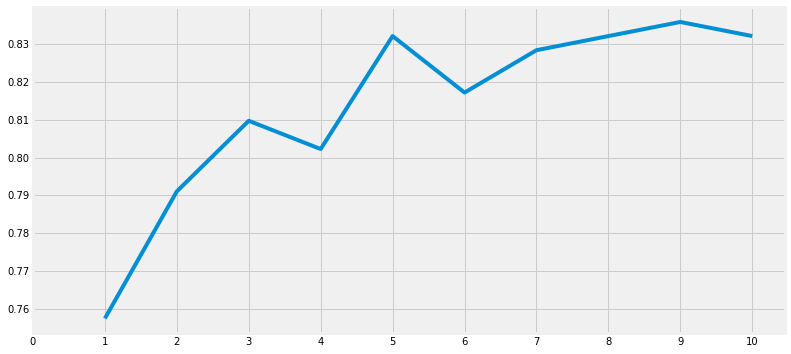

Accuracies for different values of n are:  0    0.757463
0    0.791045
0    0.809701
0    0.802239
0    0.832090
0    0.817164
0    0.828358
0    0.832090
0    0.835821
0    0.832090
dtype: float64  with the max value as  0.835820895522388


In [112]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are: ', a, ' with the max value as ', a.max())

### Gaussian Naive Bayes

In [113]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

In [115]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8134328358208955


## Cross Validation

In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 10)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.808102,0.028456
Naive Bayes,0.801386,0.028999
Random Forest,0.818215,0.027166


<AxesSubplot:>

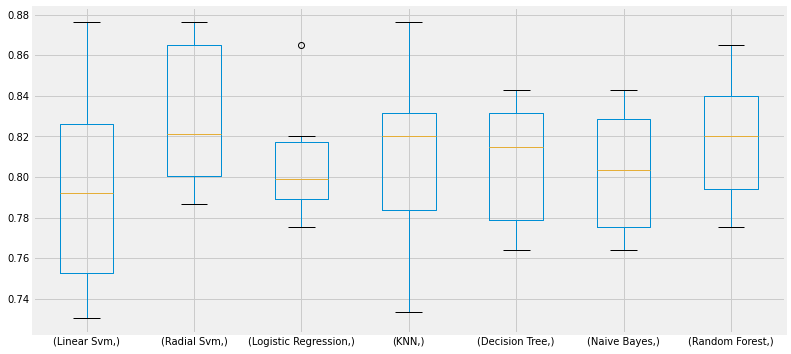

In [119]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

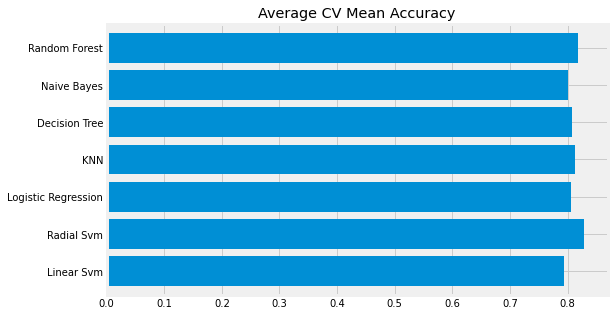

In [120]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

### Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier.

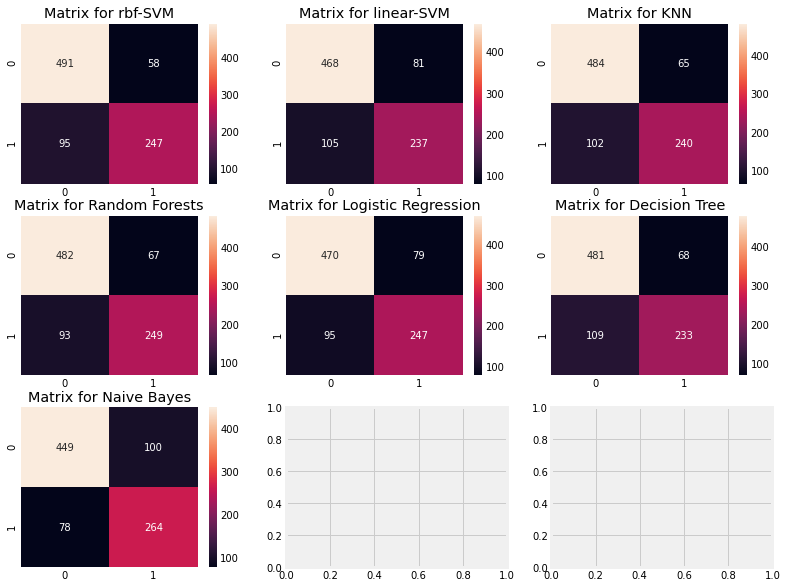

In [121]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))

y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,0], annot = True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,1], annot = True, fmt = '2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 9), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,2], annot = True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,0], annot = True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,1], annot = True, fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,2], annot = True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2,0], annot = True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.show()

#### Interpreting Confusion Matrix
- The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made.

### Hyper-Parameters Tuning

### SVM

In [126]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

kernel = ['rbf', 'linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma' : gamma}

gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [125]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}

gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling
- Ensembling is a good way to increase the accuracy of performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

### Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels.

In [128]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                 ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.4, gamma = 0.3)),
                                                 ('RFor', RandomForestClassifier(n_estimators = 300, random_state = 0)),
                                                 ('LR', LogisticRegression(C = 0.5)),
                                                 ('DT', DecisionTreeClassifier(random_state = 0)),
                                                 ('NB', GaussianNB()),
                                                 ('svm', svm.SVC(kernel = 'linear', probability = True))],
                                   voting = 'soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is  0.8249188514357053


### Bagging
It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions.

#### Bagged KNN

In [133]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('The accuracy for bagged KNN is ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is  0.835820895522388
The cross validated score for bagged KNN is:  0.8160424469413232


#### Bagged Decision Tree

In [135]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('The accuracy for bagged Decision Tree is ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is ', result.mean())

The accuracy for bagged Decision Tree is  0.8208955223880597
The cross validated score for bagged Decision Tree is  0.8171410736579275


### Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers.

#### AdaBoost(Adaptive Boosting)

In [136]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is ', result.mean())

The cross validated score for AdaBoost is  0.8249188514357055


#### Stochastic Gradient Boosting

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is ', result.mean())

The cross validated score for Gradient Boosting is  0.8115230961298376


#### XGBoost

In [139]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is ', result.mean())

[16:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Hyper-Parameter Tuning for AdaBoost

In [141]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3 ,0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

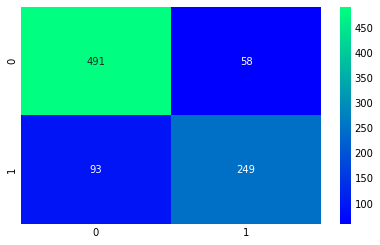

In [143]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0, learning_rate = 0.1)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap = 'winter', annot = True, fmt = '2.0f')
plt.show()

## Feature Importance

[16:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


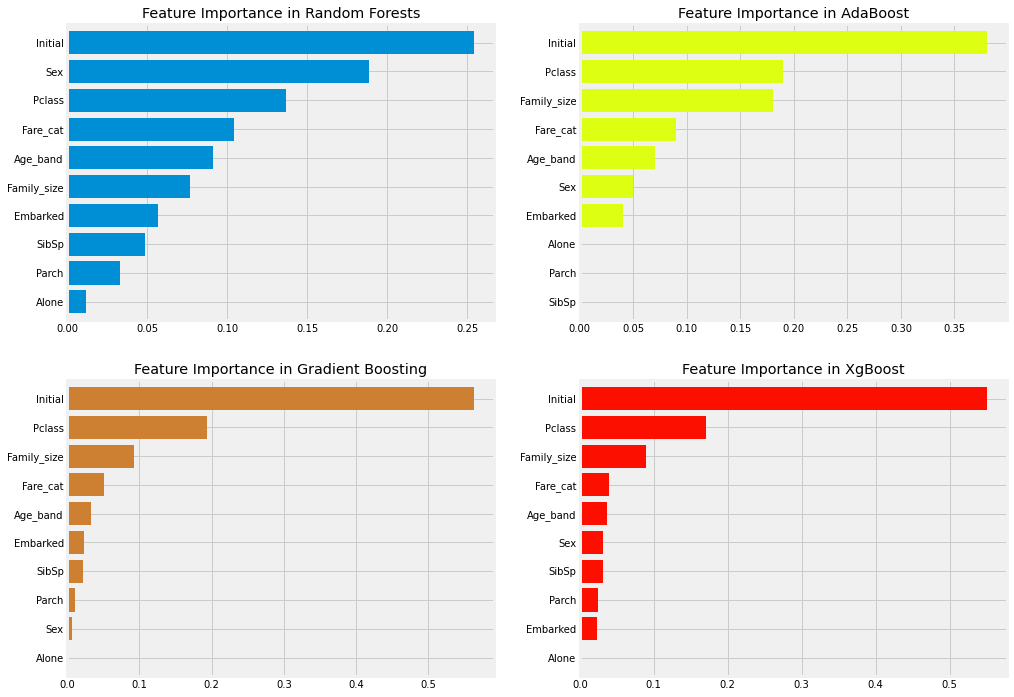

In [147]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))

model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0,1], color = '#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1,0], color = '#CD7F32')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1,1], color = '#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()